<h1>APTS REIT ANALYSIS</h1> <br>
Dated Q4 2019<br>
APTS REIT is a really trick real estate company to look at. One main reason for this has multiple branches of operations another is the equity structure. This project looks at the multiple branches. <br>
Gathered from thier 2019 Q3 report it looks like this: <br> <br>
$457 million of real estate loans to affiliates<br>
10245 multifamily units<br>
6095 Student housing beds<br>
5,644,427 feet of Grocery Anchored Stores<br>
2,878,000 feet of Office Space<br>

It is not very common in the US REIT space to mix businesses like this. Mixing different real estate businesses in one company is somewhat uncommon in other countries as well. Where I am from having multiple branches is a quite common occurrence though. So tastes vary across nations and industries as well.

To get a feel of a real estate company that has multiple branches of business, I suggest trying to <b>"split"</b> and looking at each part. The same rule goes for any category of inquiry. More insight is gotten if we SPLIT or LUMP as they say in science.

In [33]:
from matplotlib import pyplot as plt

apts_labels = ['Real Estate Loans','Multifamily','Student Beds','Grocery Anchored','Office Space']
apts_statistics = [457000000, 10245, 6095, 5644427, 2878000]

<h2>Valuation techniques</h2>
Valuation techniques come in a myriad of different ways. Some common ideas are growth, earnings (present or future), and book value. Other ideas are comparison to peers if there are any, monopoly/oligopoly, patents, management. I like to start by looking at what the portfolio real estate is worth if you add up all debt and equity. This is called enterprise value. 
An example, a Market Cap of 100 and a Debt of 100 would make an enterprise value of 200. Then you can run metrics on the market cap, the debt and, the enterprise value.

In [34]:
# First get the enterprise value by

def market_capitialization(diluted_shares, share_price):
    return diluted_shares * share_price
 
def enterprise_value(diluted_shares, share_price, total_liabilities, minorities = 0):
    market_cap = market_capitialization(diluted_shares, share_price)
    ev = market_cap + total_liabilities + minorities
    eq = market_cap
    return ev, (eq / ev)

number_of_shares = 46211000
apts_ev = enterprise_value(number_of_shares, 12,98, (1861919000-599000000+3404000000)) # prefered = blancesheetEQ - MC = 1861M-599M
# returns ev, (eq / ev)
# To get the Debt and Prefered Equity we have to actually look at a Quaterly or annual statement and take those lines out
print('The entrerprise value of APTS is: $', apts_ev[0])

The entrerprise value of APTS is: $ 5221451098


<h2>Analysis with Market Cap</h2>
With the enterprise value at hand, one can look at what the shareholders would have relatively with an investment. I am using relative to mean "with this investment what would I get as a shareholder compared to this other investment". This is a "Market cap" metric as outline above.

In [37]:
# List Comprehension to get some interesting Share Statistics
apts_share_data = [number_of_shares/(x*apts_ev[1]) for x in apts_statistics]
# A print statement with passed *args of the share data.
print('one would need: {0:.2f} shares of for $1 of loans \none would need: {1:.0f} shares for one apartment\none would need: {2:.0f} shares for one student bed\none would need: {3:.0f} shares for one foot of Grocery Anchored Space, \none would need: {4:.0f} shares for one foot of Office Space'.format(*apts_share_data))

# This set of data helps to get a picture of an investment. We can refine it a bit though.
# Lets assume we invest in 42472 shares. Which is one apartment.
invested_number_of_shares = 42472
apts_investment_data =(invested_number_of_shares / np.array(apts_share_data))
loans = apts_investment_data[0] 
#Now we have to assume that an apartment is about 900 SQF and a bed would be 300SQF. 
assumed_square_feet = [900, 300]
square_feets = [assumed_square_feet[0], assumed_square_feet[1]*apts_investment_data[2],apts_investment_data[3],apts_investment_data[4]]
feet_pet_category = zip(apts_labels[1:], square_feets)
print(list(feet_pet_category))

one would need: 0.95 shares of for $1 of loans 
one would need: 42472 shares for one apartment
one would need: 71390 shares for one student bed
one would need: 77 shares for one foot of Grocery Anchored Space, 
one would need: 151 shares for one foot of Office Space
[('Multifamily', 900), ('Student Beds', 178.4792400635445), ('Grocery Anchored', 550.9505286049507), ('Office Space', 280.9205648908291)]


<h2>Numeric Data is hard to interpret</h2>
It is still not that easy to see what an investor gets unless one is familiar with this sector. A pie chart and a bar chart helps to visualize the data.+

We know we get the equivalent of one apartment with <b>42472</b> shares. This number of shares is used in analysis later.

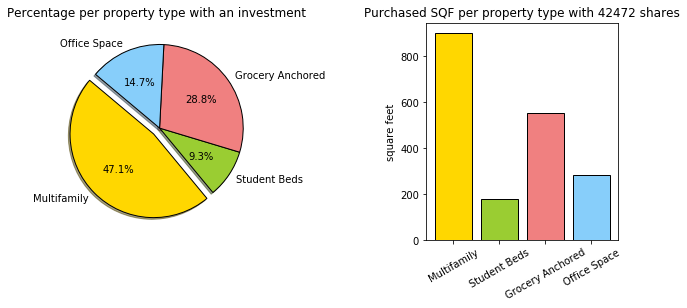

<Figure size 432x288 with 0 Axes>

In [40]:
labels = apts_labels[1:]
sizes = square_feets
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1,2,1)
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops={"edgecolor":"black",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
ax1.axis('equal')
plt.title('Percentage per property type with an investment')

ax2 = plt.subplot(1,2,2)
ax2.bar(apts_labels[1:], square_feets, color = colors, edgecolor ='black')
ax2.set_xticks(range(len(apts_labels[1:])))
ax2.set_xticklabels(apts_labels[1:], rotation = 30)
plt.title('Purchased SQF per property type with 42472 shares')
plt.ylabel('square feet')
plt.subplots_adjust(wspace = 0.9)
plt.show()
#plt.savefig('apts_investment.png')

<h2>Visual presentation</h2>
Both the Pie chart and Bar charts do a good job at explaining what we get with 42472 shares worth.

<h2>Conclusions</h2>
There is a lot of leverage in this company. So it is on the riskier side or real estate. I think the best way to parse out this company is to look at the equivalent of one apartment and then visualize what other assets come with that.

<div class="alert alert-warning">

**Disclaimer:** I most probably have owned or do own some shares in this company.

</div>